## HW2
### Use numpy to write simple neural networks and use a gradient descent algorithm to train it for classifying digits in the MNIST dataset.
    。2-1 Using cross-entropy loss
    。2-2 Using mean-square-error loss

In [2]:
from PIL import Image
import numpy as np

先下載Mnist資料

In [3]:
import os
import urllib
from urllib.request import urlretrieve
dataset = 'mnist.pkl.gz'
def reporthook(a,b,c):
    print("\rdownloading: %5.1f%%"%(a*b*100.0/c), end="")
    
if not os.path.isfile(dataset):
        origin = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
        print('Downloading data from %s' % origin)
        urlretrieve(origin, dataset, reporthook=reporthook)

Input Data 

In [4]:
import gzip
import pickle
with gzip.open(dataset, 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')

切分資料集

In [5]:
# 設定好訓練及測試資料
train_X, train_y = train_set
test_X, test_y = test_set
# 設定成我們的格式
train_X = train_X[..., None]
test_X = test_X[..., None]

查看類別數 .unique / 查看資料維度 .shape 

In [6]:
print("查看訓練資料維度：",end=" ")
print(train_X.shape)
print("查看預測的資料類別：",end=" ")
print(np.unique(train_y))


查看訓練資料維度： (50000, 784, 1)
查看預測的資料類別： [0 1 2 3 4 5 6 7 8 9]


In [7]:
from IPython.display import display
def showX(X):
    int_X = (X*255).clip(0,255).astype('uint8')
    # N*784 -> N*28*28 -> 28*N*28 -> 28 * 28N
    int_X_reshape = int_X.reshape(-1,28,28).swapaxes(0,1).reshape(28,-1)
    display(Image.fromarray(int_X_reshape))
# 訓練資料， X 的前 20 筆
print(train_y[:20])
showX(train_X[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [8]:
def softmax(x):
    t = np.exp(x)
    return t/t.sum(axis=(-2,-1),keepdims=True)
def relu(x):
    return np.maximum(x, 0)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 微分
def Drelu(x):
    return (x>0).astype('float32')
def Dsigmoid(x):
    q = sigmoid(x)
    return q * (1-q) 

# HW2-1 Using cross-entropy loss 

In [29]:
accuracy_history = []
loss_history = []
n_data = train_X.shape[0]

L = 0.05
W = np.random.normal(size=(50,784))
b = np.random.normal(size=(50,1))
C = np.random.normal(size=(10,50))
d = np.random.normal(size=(10,1))

In [30]:
print("Epoch    Accuracy    Loss ")
for epochs in range(16):
    #隨機取樣
    idx = np.random.choice(n_data,5000, replace=False)
    for i in idx:
        x = train_X[i]
        y = train_y[i]
        U = relu(W@x+b)
        pred_Y = softmax(C@U+d)
        CE = - np.log(q[y])[0] #計算cross entropy
        y = np.eye(10)[y][:, None] #使y轉成可相減的矩陣
        grad_d = pred_Y - y
        grad_C = grad_d @ U.T
        grad_b = (C.T @ grad_d ) * Drelu(W@x+b)
        grad_W = grad_b @ x.T
        W = W - L * grad_W
        b = b - L * grad_b
        C = C - L * grad_C
        d = d - L * grad_d
    loss_history.append(CE)
    Pred_test_y = (C@relu(W@test_X+b)+d).argmax(axis=1).ravel()
    acc = (Pred_test_y == test_y).mean()
    accuracy_history.append(acc)
    print(epochs, acc , CE)

Epoch    Accuracy    Loss 
0 0.6297 3.8434699867934446e-11
1 0.7152 41.08892914927418
2 0.7713 59.95379463391404
3 0.8418 3.8434699867934446e-11
4 0.8482 36.90176803660865
5 0.8375 24.69681129532181
6 0.8605 41.08892914927418
7 0.8726 24.671823267481805
8 0.8098 28.693903240653828
9 0.7929 24.671823267481805
10 0.8839 61.08143596221137
11 0.8671 61.08143596221137
12 0.8111 24.671823267481805
13 0.8694 55.55693712928669
14 0.8713 61.08143596221137
15 0.8917 59.95379463391404


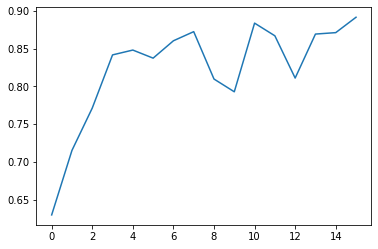

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
# accuracy 的圖
plt.plot(accuracy_history);

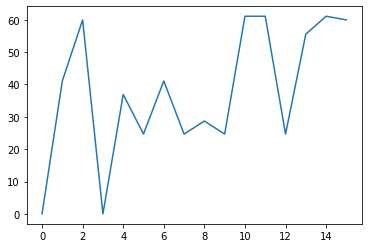

In [32]:
# loss 的圖
plt.plot(loss_history);

# HW2-2 Using mean square error loss 

In [18]:
# 參考範例 softmax regression
W = np.random.normal(size=(10, 784))
b = np.random.normal(size=(10, 1))
n_data = train_X.shape[0]
# 紀錄 loss
loss_history = []
accuracy_history = []

L = 0.5 #learing rate

print("Epoch    Accuracy    Loss ")
for epoch in range(301):    
    idx = np.random.choice(n_data, 1000, replace=False)
    X = train_X[idx]
    y = train_y[idx]
    y = np.eye(10)[y][..., None]
    Y_pred = W @ X + b  # The current predicted value of Y
    
    #計算該次epoch的loss(mse)與acc(供後續圖表使用)
    mse = (sum((y-Y_pred)**2)/n_data).mean()
    loss_history.append(mse)
    acc = (Y_pred.argmax(axis=1).ravel() == y).mean()
    accuracy_history.append(acc)    
    
    #每100次epoch就輸出一次
    if epoch%100 == 0:
        print(epoch, acc, mse)
        
    grad_W = (-2/n_data) * sum((y - Y_pred)@ X.swapaxes(1,2))  # Derivative wrt m
    grad_b = (-2/n_data) * sum(y - Y_pred)  # Derivative wrt c
    W = W - (L * grad_W)  # Update W
    b = b - (L * grad_b)  # Update b
    

Epoch    Accuracy    Loss 
0 0.1102 1.7505057326993299
100 0.0973 0.21142571167729168
200 0.0787 0.13288339329980248
300 0.0958 0.10676249000649292


In [19]:
pred = (W @ test_X + b).argmax(axis=1).ravel()
print("Predict前30筆",pred[:30])
print("Test_y 前30筆",test_y[:30])
# test data 的正確率
acc = (pred == test_y).mean()
print("Accuracy : ",acc)

Predict前30筆 [7 2 7 0 7 9 6 9 0 6 4 1 4 8 3 5 7 7 3 7 6 0 3 6 8 4 7 2 4 0]
Test_y 前30筆 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy :  0.1515


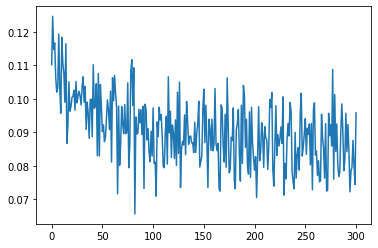

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
# accuracy 的圖
plt.plot(accuracy_history);

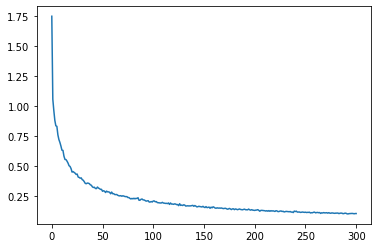

In [21]:
# loss 的圖
plt.plot(loss_history);